In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
from salishsea_tools import evaltools as et, viz_tools
import cmocean

%matplotlib inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

## Import NGPO Index

In [4]:
df = pd.read_csv('/ocean/ksuchy/MOAD/observe/NPGO1995-2022.csv', index_col=0,header=0)

In [5]:
df.index.name = "YEAR"
df = df.apply(pd.to_numeric) # convert all columns of DataFrame
#df = df[:-1]

In [6]:
df.loc[1995:2019]

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Unnamed: 13,Unnamed: 14
YEAR,,,,,,,,,,,,,,
1995,-0.500000,-1.560000,-2.050000,-1.820000,-1.500000,-1.050000,-1.500000,-1.010000,-0.890000,-0.520000,-0.280000,-0.640000,NaN,NaN
1996,-0.640000,-1.050000,-1.150000,-0.440000,-1.270000,-1.060000,-0.890000,-0.750000,-0.930000,-1.040000,-1.100000,-1.350000,NaN,NaN
1997,-1.640000,-1.110000,-0.620000,-0.510000,-0.880000,-0.940000,-0.770000,-0.790000,-0.480000,-0.590000,-0.170000,-0.260000,NaN,NaN
1998,-0.530000,1.900000,0.890000,0.520000,0.280000,0.120000,0.390000,0.270000,0.040000,0.100000,0.720000,0.770000,NaN,NaN
1999,1.080000,2.300000,1.970000,1.650000,1.600000,1.910000,1.380000,1.430000,1.300000,1.180000,1.320000,1.050000,NaN,NaN
2000,1.400000,2.120000,2.150000,2.370000,2.220000,2.100000,1.660000,1.350000,1.380000,1.700000,2.010000,2.160000,NaN,NaN
2001,2.860000,2.960000,2.390000,2.200000,1.950000,2.350000,1.500000,1.920000,1.890000,1.160000,1.760000,2.020000,NaN,NaN
2002,1.860000,2.180000,1.900000,0.900000,1.100000,1.610000,1.380000,0.810000,0.820000,0.820000,1.660000,2.640000,NaN,NaN
2003,1.970000,0.990000,1.490000,1.100000,0.920000,0.780000,1.200000,0.780000,0.870000,1.290000,-0.110000,0.220000,NaN,NaN


In [7]:
NPGO = df.loc[1995:2019].to_numpy().flatten()

## Import 1995-2019 Zooplankton Data

In [8]:
df2=pd.read_csv('/ocean/ksuchy/MOAD/analysis-karyn/notebooks/SoGZoopBiomass/SoGZoopBiomass_1995to2019.csv',
               encoding = "ISO-8859-1")

In [9]:
#rename columns
df2.rename(columns={'DEPTH_STRT1':'Z_lower','DEPTH_END1':'Z_upper'},inplace=True)

### Focus on Central SoG Only

In [10]:
biomassDF=df2.loc[df2.region_name=='Central Strait of Georgia']

### Calculate Total Biomass of all Zooplankton Groups

In [11]:
biomassDF['Total']=((biomassDF['Diplostraca']+biomassDF['Thecostraca']+biomassDF['Amphipoda']+\
                    biomassDF['Decapoda']+biomassDF['Euphausiacea']+\
                    biomassDF['Calanoida']+biomassDF['Cyclopoida']+biomassDF['Poecilostomatoida']+\
                    biomassDF['Halocyprida']+biomassDF['Aphragmophora']+biomassDF['Copelata']+\
                   biomassDF['Leptothecate']+biomassDF['Siphonophorae']+biomassDF['Trachylina']+\
                   biomassDF['Cydippida']+biomassDF['Pholadomyoida']+biomassDF['Neotaenioglossa']+\
                   biomassDF['Thecosomata']+biomassDF['Aciculata']+biomassDF['Canalipalpata']+\
                   biomassDF['Osmeriformes']+biomassDF['Perciformes']+biomassDF['Beroida']+\
                   biomassDF['Teuthida']+biomassDF['Gymnosomata']+biomassDF['Isopoda']+\
                   biomassDF['Siphonostomatoida']+biomassDF['Anthoathecatae']+biomassDF['Scorpaeniformes']+\
                   biomassDF['Phragmophora']+biomassDF['Clupeiformes']+biomassDF['Ophiurida']+\
                   biomassDF['Gadiformes']+biomassDF['Semaeostomeae']+biomassDF['Cumacea']+\
                   biomassDF['Echinoida']+biomassDF['Harpacticoida']+biomassDF['Pleuronectiformes']+\
                   biomassDF['Tricladida']+biomassDF['Myodocopida']+biomassDF['Phaeogromia']+\
                   biomassDF['Noctilucales']+biomassDF['Octopoda']+biomassDF['Actiniaria']+\
                   biomassDF['Mysida']+biomassDF['Acariformes']+biomassDF['Lophogastrida']+\
                   biomassDF['Ophidiiformes']+biomassDF['Thalassocalycida']+biomassDF['Doliolida']+\
                   biomassDF['Lepadomorpha']+biomassDF['Cephalaspidea']+biomassDF['Sygnathiformes']+\
                    biomassDF['Coronatae']+biomassDF['Lobata']+biomassDF['Arthracanthida']+biomassDF['Myctophiformes']+\
                    biomassDF['Mormonilloida']+biomassDF['Phaeocystida']+biomassDF['Phaeosphaeria'])*0.45)

/tmp/ipykernel_2005876/2723038005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biomassDF['Total']=((biomassDF['Diplostraca']+biomassDF['Thecostraca']+biomassDF['Amphipoda']+\


In [12]:
biomassDF['Total']

74      21.769533
75      81.807165
84       7.484274
85      13.519715
86      10.665540
          ...    
2406    25.229354
2407     9.283959
2408    20.538675
2409    10.438439
2410    14.204228
Name: Total, Length: 690, dtype: float64

In [13]:
biomassDF['Total mg m2']=(biomassDF['Total'])*biomassDF['Z_lower']/1000

/tmp/ipykernel_2005876/3913206691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biomassDF['Total mg m2']=(biomassDF['Total'])*biomassDF['Z_lower']/1000


In [14]:
biomassDF['Total mg m2']

74       8.707813
75      32.722866
84       1.893521
85       0.675986
86       4.266216
          ...    
2406     2.522935
2407     3.620744
2408     2.053868
2409     4.070991
2410     5.539649
Name: Total mg m2, Length: 690, dtype: float64

In [15]:
# define log transform function with slight shift to accommodate zero values
def logt(x):
  return np.log10(x+.001)

In [16]:
biomassDF['dtUTC']=pd.to_datetime(biomassDF['dtUTC']) ##to make sure dtUTC is a datetime data type

/tmp/ipykernel_2005876/3564984627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biomassDF['dtUTC']=pd.to_datetime(biomassDF['dtUTC']) ##to make sure dtUTC is a datetime data type


In [17]:
biomassDF['dtUTC']

74     1997-10-28 20:00:00
75     1997-10-28 20:00:00
84     1998-02-27 01:17:00
85     1998-02-27 01:29:00
86     1998-02-26 20:00:00
               ...        
2406   2005-05-13 19:00:00
2407   2005-05-13 19:15:00
2408   2005-06-23 19:00:00
2409   2005-06-23 19:15:00
2410   2005-09-24 19:15:00
Name: dtUTC, Length: 690, dtype: datetime64[ns]

In [18]:
#create new columns
biomassDF['Year']=[ii.year for ii in biomassDF['dtUTC']]
biomassDF['Month']=[ii.month for ii in biomassDF['dtUTC']]
biomassDF['YD']=et.datetimeToYD(biomassDF['dtUTC'])

/tmp/ipykernel_2005876/1014490185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biomassDF['Year']=[ii.year for ii in biomassDF['dtUTC']]
/tmp/ipykernel_2005876/1014490185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biomassDF['Month']=[ii.month for ii in biomassDF['dtUTC']]
/tmp/ipykernel_2005876/1014490185.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [19]:
biomassDF['Year']

74      1997
75      1997
84      1998
85      1998
86      1998
        ... 
2406    2005
2407    2005
2408    2005
2409    2005
2410    2005
Name: Year, Length: 690, dtype: int64

In [20]:
## Calculate Monthly Mean Biomass
MonthlyBiomass=biomassDF.groupby([(biomassDF.Year), (biomassDF.Month)]).mean()



In [21]:
MonthlyBiomass

Unnamed: 0         lon        lat  Mesh_Size(um)     Z_lower  \
Year Month                                                                  
1995 5      1156.500000 -124.085000  49.351000     253.000000  243.000000   
     6      1161.000000 -124.085000  49.351000     253.000000  226.000000   
     8      1164.500000 -124.083000  49.351000     253.000000  200.000000   
     9      1166.500000 -124.084500  49.409000     253.000000  220.000000   
1996 2      1208.500000 -123.748000  49.250000     202.000000  400.000000   
...                 ...         ...        ...            ...         ...   
2019 5      1117.000000 -123.749000  49.250000     236.000000  388.000000   
     6      1580.000000 -123.725000  49.277000     244.500000  268.000000   
     7      1578.000000 -123.672000  49.162000     244.500000  297.000000   
     9      1203.307692 -123.537615  49.158385     237.307692  262.153846   
     10     1152.000000 -123.749000  49.250000     236.000000  390.000000   

            Z_upper  Bottom Depth(m)  Diplostraca  Thecostraca  Amphipoda  \
Year Month                                                                  
1995 5          0.0       243.000000     0.000000     0.000000   1.236220   
     6          0.0       246.000000     0.000000     0.000000   7.304460   
     8          0.0       256.000000     0.000000     0.020110   6.270735   
     9          0.0       312.500000     0.000000     0.287695  16.562060   
1996 2          0.0       400.000000     0.001910     0.000000   2.404050   
...             ...              ...          ...          ...        ...   
2019 5          0.0       398.000000     0.000000     1.340140  22.602670   
     6          0.0       341.000000     0.024060     0.336840  14.380515   
     7          0.0       305.000000     0.011405     0.629325  18.954900   
     9          0.0       270.153846     0.001505     0.044999  42.097882   
     10         0.0       400.000000     0.000000     0.000000  17.267880   

            ...  Coronatae  Lobata  Arthracanthida  Myctophiformes  \
Year Month  ...                                                      
1995 5      ...        0.0     0.0             0.0             0.0   
     6      ...        0.0     0.0             0.0             0.0   
     8      ...        0.0     0.0             0.0             0.0   
     9      ...        0.0     0.0             0.0             0.0   
1996 2      ...        0.0     0.0             0.0             0.0   
...         ...        ...     ...             ...             ...   
2019 5      ...        0.0     0.0             0.0             0.0   
     6      ...        0.0     0.0             0.0             0.0   
     7      ...        0.0     0.0             0.0             0.0   
     9      ...        0.0     0.0             0.0             0.0   
     10     ...        0.0     0.0             0.0             0.0   

            Mormonilloida  Phaeocystida  Phaeosphaeria      Total  \
Year Month                                                          
1995 5                0.0           0.0            0.0   4.236754   
     6                0.0           0.0            0.0  19.335002   
     8                0.0           0.0            0.0  18.085788   
     9                0.0           0.0            0.0  23.440930   
1996 2                0.0           0.0            0.0  15.068284   
...                   ...           ...            ...        ...   
2019 5                0.0           0.0            0.0  58.568945   
     6                0.0           0.0            0.0  60.523337   
     7                0.0           0.0            0.0  43.586284   
     9                0.0           0.0            0.0  52.821834   
     10               0.0           0.0            0.0  39.973896   

            Total mg m2          YD  
Year Month                           
1995 5         1.029531  144.000000  
     6         4.369710  161.000000  
     8         3.617158  243.000000  
     9    

In [22]:
MonthlyBiomass.reset_index(level=['Year','Month'])

,Year,Month,Unnamed: 0,lon,lat,Mesh_Size(um),Z_lower,Z_upper,Bottom Depth(m),Diplostraca,...,Coronatae,Lobata,Arthracanthida,Myctophiformes,Mormonilloida,Phaeocystida,Phaeosphaeria,Total,Total mg m2,YD
0,1995,5,1156.500000,-124.085000,49.351000,253.000000,243.000000,0.0,243.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.236754,1.029531,144.000000
1,1995,6,1161.000000,-124.085000,49.351000,253.000000,226.000000,0.0,246.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.335002,4.369710,161.000000
2,1995,8,1164.500000,-124.083000,49.351000,253.000000,200.000000,0.0,256.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.085788,3.617158,243.000000
3,1995,9,1166.500000,-124.084500,49.409000,253.000000,220.000000,0.0,312.500000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.440930,4.739194,272.000000
4,1996,2,1208.500000,-123.748000,49.250000,202.000000,400.000000,0.0,400.000000,0.001910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.068284,6.027313,43.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2019,5,1117.000000,-123.749000,49.250000,236.000000,388.000000,0.0,398.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.568945,22.724750,143.000000
158,2019,6,1580.000000,-123.725000,49.277000,244.500000,268.000000,0.0,341.000000,0.024060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.523337,16.599216,168.500000
159,2019,7,1578.000000,-123.672000,49.162000,244.500000,297.000000,0.0,305.000000,0.011405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.586284,14.078791,183.500000
160,2019,9,1203.307692,-123.537615,49.158385,237.307692,262.153846,0.0,270.153846,0.001505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.821834,13.753040,252.923077


In [23]:
## Calculate Mean Annual Biomass based off of monthly means 
AnnualBiomass=MonthlyBiomass.groupby(['Year']).mean()



In [24]:
AnnualBiomass

,Unnamed: 0,lon,lat,Mesh_Size(um),Z_lower,Z_upper,Bottom Depth(m),Diplostraca,Thecostraca,Amphipoda,...,Coronatae,Lobata,Arthracanthida,Myctophiformes,Mormonilloida,Phaeocystida,Phaeosphaeria,Total,Total mg m2,YD
Year,,,,,,,,,,,,,,,,,,,,,
1995,1162.125000,-124.084375,49.365500,253.000000,222.250000,0.000000,264.375000,0.000000,0.076951,7.843369,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,16.274618,3.438898,205.000000
1996,1209.500000,-123.748000,49.250000,202.000000,400.000000,0.000000,400.000000,0.000955,0.000000,4.424140,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,16.290001,6.516000,71.000000
1997,1123.111111,-123.750000,49.250000,212.888889,400.000000,0.000000,400.000000,0.005095,0.011889,8.993483,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,26.329113,10.531645,185.666667
1998,762.057143,-123.908567,49.300052,224.180952,282.119048,0.000000,366.166667,0.027553,0.239759,8.880678,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,29.488087,8.164922,129.323810
1999,407.500000,-123.944000,49.314375,264.500000,167.875000,0.000000,387.875000,0.158695,0.158199,57.088870,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,105.054431,11.628553,199.250000
2000,422.625000,-123.941250,49.315750,268.750000,156.500000,0.000000,362.250000,0.017143,0.863350,9.029660,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,32.223217,6.724269,186.500000
2001,760.000000,-123.879792,49.282167,293.000000,127.083333,0.000000,298.333333,0.023679,0.259090,8.982619,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,31.522900,6.656428,184.833333
2002,1903.651515,-123.781727,49.256242,241.181818,121.909091,0.000000,385.393939,0.004804,0.337089,2.444869,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,13.717208,1.583459,196.757576
2003,2219.350000,-123.761508,49.252525,239.800000,157.933333,0.000000,392.891667,0.212408,0.131858,5.064182,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,12.071286,2.192771,162.475000


#### Here we have to address the differing results that can be observed using different climatological years. Mackas et al. 2013 and Perry et al. 2021 use a climatology of 1995-2010, BUT we have almost 10 additional years in the timeseries that we can use in the climatology (much warmer years, at that).

### Want to check results of zooplankton biomass anomalies vs. NPGO Index using different climatological years

## Total Zooplankton

In [25]:
Climatology_Mackas=logt(AnnualBiomass['Total mg m2'][0:16]).mean() #calculate climatology as per Perry et al. 2021 using years 1996-2010 only

In [26]:
Climatology=logt(AnnualBiomass['Total mg m2']).mean() #calculate climatology across all years in the timeseries (1995-2019)

In [27]:
TotalZoopAnomaly_Mackas=(logt(AnnualBiomass['Total mg m2'])-Climatology_Mackas) ## calculate anomalies on logged data as per Mackas and Perry

In [28]:
TotalZoopAnomaly=(logt(AnnualBiomass['Total mg m2'])-Climatology)

In [29]:
TotalZoopAnomaly_Mackas

Year
1995   -0.175043
1996    0.102459
1997    0.310949
1998    0.200417
1999    0.353974
2000    0.116121
2001    0.111718
2002   -0.511708
2003   -0.370398
2004   -0.192158
2005   -0.241811
2006   -0.040367
2007    0.102691
2008    0.018326
2009    0.116001
2010    0.098830
2011    0.277654
2012   -0.035689
2013    0.043128
2014   -0.090912
2015    0.209283
2016    0.223403
2017    0.168227
2018    0.202753
2019    0.399493
Name: Total mg m2, dtype: float64

In [30]:
TotalZoopAnomaly

Year
1995   -0.230937
1996    0.046565
1997    0.255055
1998    0.144523
1999    0.298081
2000    0.060227
2001    0.055824
2002   -0.567601
2003   -0.426291
2004   -0.248052
2005   -0.297705
2006   -0.096261
2007    0.046797
2008   -0.037568
2009    0.060107
2010    0.042936
2011    0.221761
2012   -0.091583
2013   -0.012765
2014   -0.146805
2015    0.153389
2016    0.167509
2017    0.112333
2018    0.146860
2019    0.343600
Name: Total mg m2, dtype: float64

In [31]:
Annual_NPGO_index=np.array([
    -1.11,
    -0.97,
    -0.73,
    0.46,
    1.51,
    1.89,
    2.08,
    1.47,
    0.96,
    0.21,
    -1.38,
    -0.56,
    0.42,
    1.41,
    0.41,
    1.24,
    0.83,
    1.36,
    0.12,
    -0.13,
    -1.32,
    -0.03,
    -0.57,
    -1.90,
    -2.19])
#-1.56
#-0.88
#-0.61

In [32]:
Years=np.array([1995,
                1996,
                1997,
                1998,
                1999,
                2000,
                2001,
                2002,
                2003,
                2004,
                2005,
                2006,
                2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]) #2020,2021,2022

Text(0.5, 1.0, 'NPGO vs. Total Zooplankton Anomalies (1995-2019 climatology)')

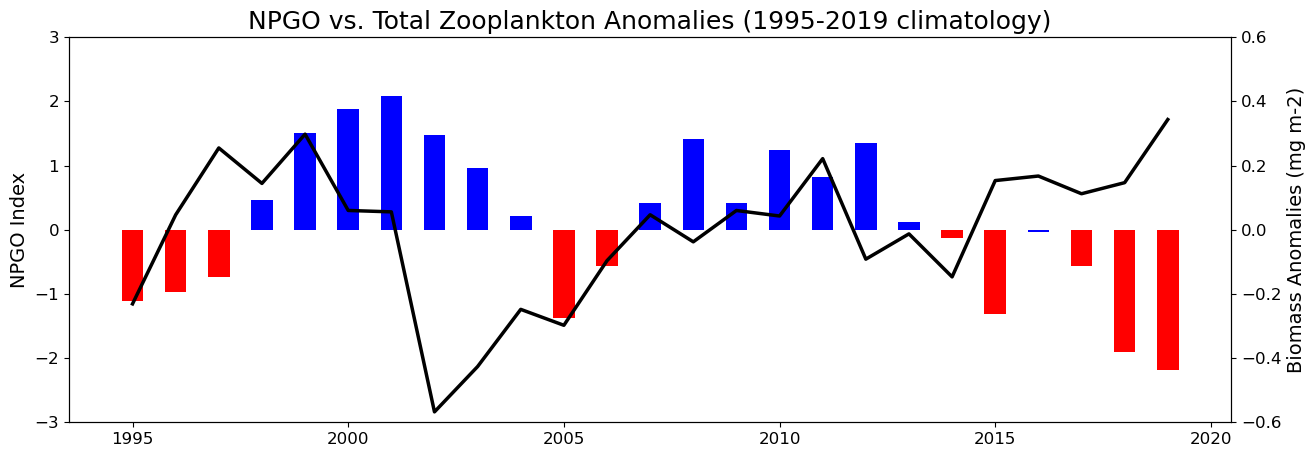

In [33]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()
colors=['r','r','r','b','b','b','b','b','b','b','r','r','b','b','b','b','b','b','b','r','r','b','r','r','r']

ax1.bar(Years, Annual_NPGO_index, width=.5, color=colors,label='NPGO Index')
ax2.plot(Years,TotalZoopAnomaly,color='k',linewidth=2.5,label='0-100 m Diatom Anomalies')
ax1.set_ylim(-3,3)
ax2.set_ylim(-.6,.6)
ax1.set_ylabel('NPGO Index',fontsize=14)
ax2.set_ylabel('Biomass Anomalies (mg m-2)',fontsize=14)
ax1.set_title('NPGO vs. Total Zooplankton Anomalies (1995-2019 climatology)',fontsize=18)

Text(0.5, 1.0, 'NPGO vs. Total Zooplankton Anomalies (1995-2010 climatology)')

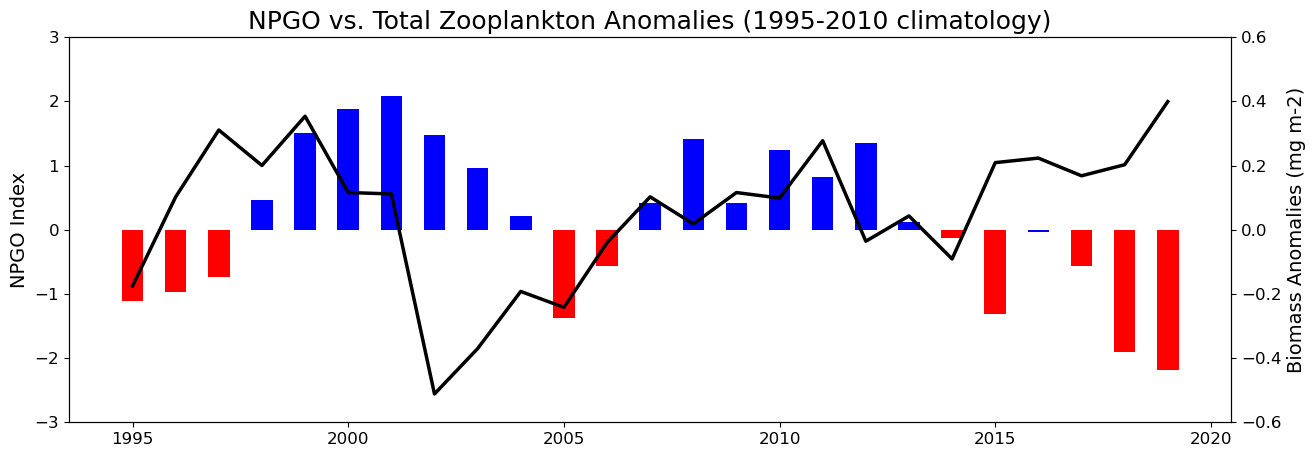

In [57]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()
colors=['r','r','r','b','b','b','b','b','b','b','r','r','b','b','b','b','b','b','b','r','r','b','r','r','r']

ax1.bar(Years, Annual_NPGO_index, width=.5, color=colors,label='NPGO Index')
ax2.plot(Years,TotalZoopAnomaly_Mackas,color='k',linewidth=2.5,label='0-100 m Diatom Anomalies')
ax1.set_ylim(-3,3)
ax2.set_ylim(-.6,.6)
ax1.set_ylabel('NPGO Index',fontsize=14)
ax2.set_ylabel('Biomass Anomalies (mg m-2)',fontsize=14)
ax1.set_title('NPGO vs. Total Zooplankton Anomalies (1995-2010 climatology)',fontsize=18)

## Crustaceans

In [35]:
AnnualBiomass['Crustaceans']=(AnnualBiomass.Decapoda+AnnualBiomass.Euphausiacea+AnnualBiomass.Calanoida+\
                        AnnualBiomass.Amphipoda)*AnnualBiomass.Z_lower*0.45/1000                    

In [36]:
CrustaceanClimatology_Mackas=logt(AnnualBiomass['Crustaceans'][0:16]).mean()

In [37]:
CrustaceanAnomaly_Mackas=(logt(AnnualBiomass['Crustaceans'])-CrustaceanClimatology_Mackas)

In [38]:
CrustaceanAnomaly_Mackas

Year
1995   -0.077971
1996    0.154256
1997    0.402475
1998    0.258611
1999    0.615715
2000   -0.066974
2001   -0.129081
2002   -0.611277
2003   -0.456115
2004   -0.228507
2005   -0.357274
2006   -0.026208
2007    0.107530
2008    0.108314
2009    0.135101
2010    0.171404
2011    0.243419
2012   -0.021341
2013    0.099403
2014   -0.048816
2015    0.204748
2016    0.167989
2017    0.151573
2018    0.200291
2019    0.428834
Name: Crustaceans, dtype: float64

In [39]:
CrustaceanClimatology=logt(AnnualBiomass['Crustaceans']).mean()

In [40]:
CrustaceanAnomaly=(logt(AnnualBiomass['Crustaceans'])-CrustaceanClimatology)

In [41]:
CrustaceanAnomaly

Year
1995   -0.135015
1996    0.097212
1997    0.345431
1998    0.201567
1999    0.558671
2000   -0.124018
2001   -0.186125
2002   -0.668321
2003   -0.513159
2004   -0.285551
2005   -0.414318
2006   -0.083252
2007    0.050486
2008    0.051270
2009    0.078057
2010    0.114360
2011    0.186375
2012   -0.078385
2013    0.042359
2014   -0.105860
2015    0.147704
2016    0.110945
2017    0.094529
2018    0.143247
2019    0.371790
Name: Crustaceans, dtype: float64

Text(0.5, 1.0, 'NPGO vs. Crustacean Anomalies (1995-2019 climatology)')

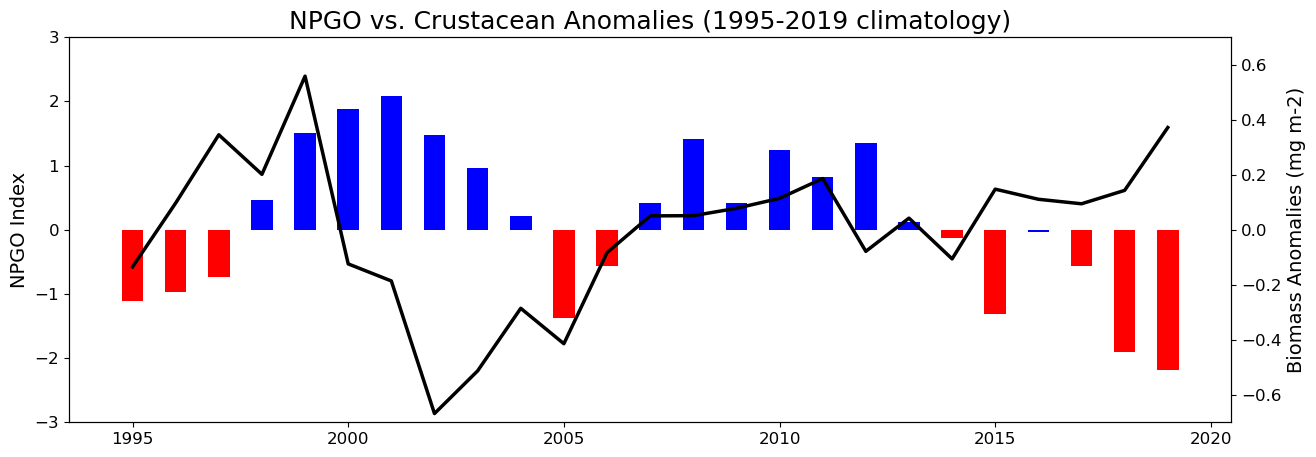

In [42]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()
colors=['r','r','r','b','b','b','b','b','b','b','r','r','b','b','b','b','b','b','b','r','r','b','r','r','r']

ax1.bar(Years, Annual_NPGO_index, width=.5, color=colors,label='NPGO Index')
ax2.plot(Years,CrustaceanAnomaly,color='k',linewidth=2.5,label='0-100 m Diatom Anomalies')
ax1.set_ylim(-3,3)
ax2.set_ylim(-.7,.7)
ax1.set_ylabel('NPGO Index',fontsize=14)
ax2.set_ylabel('Biomass Anomalies (mg m-2)',fontsize=14)
ax1.set_title('NPGO vs. Crustacean Anomalies (1995-2019 climatology)',fontsize=18)

Text(0.5, 1.0, 'NPGO vs. Crustacean Anomalies (1995-2010 climatology)')

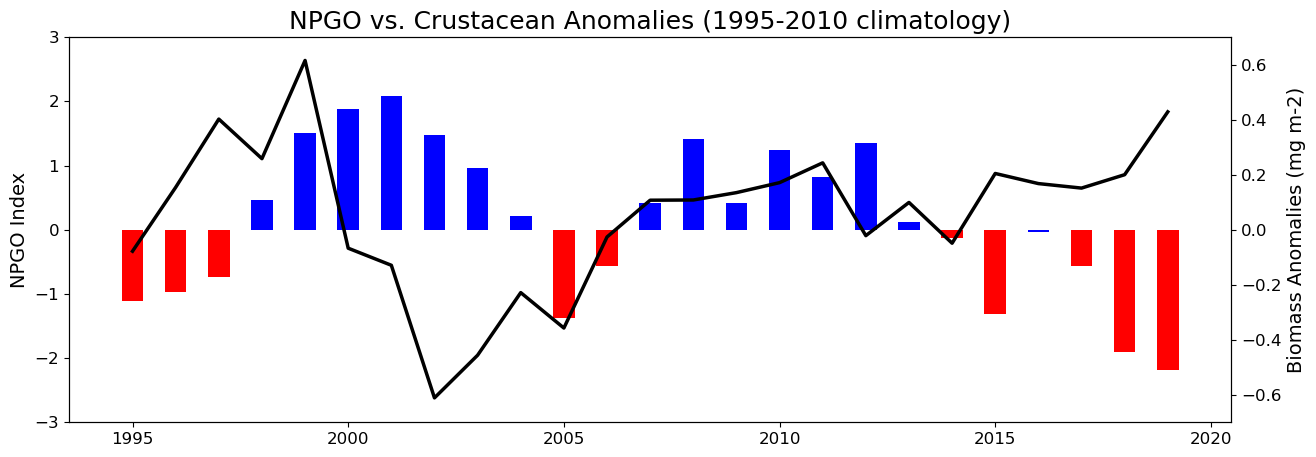

In [43]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()
colors=['r','r','r','b','b','b','b','b','b','b','r','r','b','b','b','b','b','b','b','r','r','b','r','r','r']

ax1.bar(Years, Annual_NPGO_index, width=.5, color=colors,label='NPGO Index')
ax2.plot(Years,CrustaceanAnomaly_Mackas,color='k',linewidth=2.5,label='0-100 m Diatom Anomalies')
ax1.set_ylim(-3,3)
ax2.set_ylim(-.7,.7)
ax1.set_ylabel('NPGO Index',fontsize=14)
ax2.set_ylabel('Biomass Anomalies (mg m-2)',fontsize=14)
ax1.set_title('NPGO vs. Crustacean Anomalies (1995-2010 climatology)',fontsize=18)

In [44]:
AnnualBiomass.keys()

Index(['Unnamed: 0', 'lon', 'lat', 'Mesh_Size(um)', 'Z_lower', 'Z_upper',
       'Bottom Depth(m)', 'Diplostraca', 'Thecostraca', 'Amphipoda',
       'Decapoda', 'Euphausiacea', 'Calanoida', 'Cyclopoida',
       'Poecilostomatoida', 'Halocyprida', 'Aphragmophora', 'Copelata',
       'Leptothecate', 'Siphonophorae', 'Trachylina', 'Cydippida',
       'Pholadomyoida', 'Neotaenioglossa', 'Thecosomata', 'Aciculata',
       'Canalipalpata', 'Osmeriformes', 'Perciformes', 'Beroida', 'Teuthida',
       'Gymnosomata', 'Isopoda', 'Siphonostomatoida', 'Anthoathecatae',
       'Scorpaeniformes', 'Phragmophora', 'Clupeiformes', 'Ophiurida',
       'Gadiformes', 'Semaeostomeae', 'Cumacea', 'Echinoida', 'Harpacticoida',
       'Pleuronectiformes', 'Tricladida', 'Myodocopida', 'Phaeogromia',
       'Noctilucales', 'Octopoda', 'Actiniaria', 'Foraminiferida',
       'Monstrilloida', 'Oligotrichida', 'Mysida', 'Acariformes',
       'Lophogastrida', 'Ophidiiformes', 'Thalassocalycida', 'Doliolida',
      

## Larvaceans

In [45]:
LarvaceanClimatology=logt(AnnualBiomass['Copelata']).mean()

In [46]:
LarvaceanAnomaly=(logt(AnnualBiomass['Copelata'])-LarvaceanClimatology)

Text(0.5, 1.0, 'NPGO vs. Larvacean Anomalies (1995-2019 climatology)')

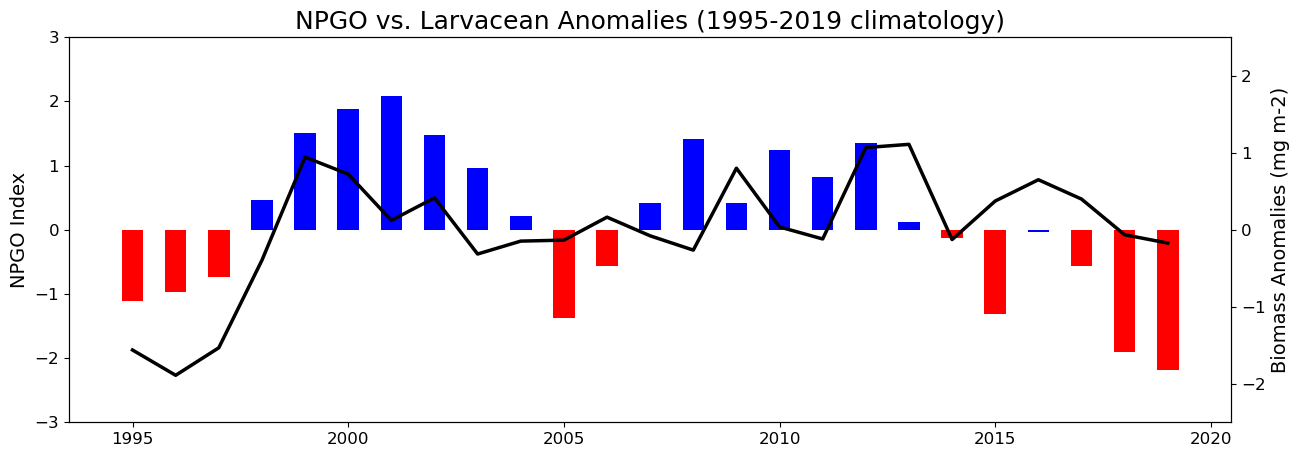

In [47]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()
colors=['r','r','r','b','b','b','b','b','b','b','r','r','b','b','b','b','b','b','b','r','r','b','r','r','r']

ax1.bar(Years, Annual_NPGO_index, width=.5, color=colors,label='NPGO Index')
ax2.plot(Years,LarvaceanAnomaly,color='k',linewidth=2.5,label='0-100 m Diatom Anomalies')
ax1.set_ylim(-3,3)
ax2.set_ylim(-2.5,2.5)
ax1.set_ylabel('NPGO Index',fontsize=14)
ax2.set_ylabel('Biomass Anomalies (mg m-2)',fontsize=14)
ax1.set_title('NPGO vs. Larvacean Anomalies (1995-2019 climatology)',fontsize=18)

## Calanoid Copepods

In [48]:
CalanoidClimatology=logt(AnnualBiomass['Calanoida']).mean()

In [49]:
CalanoidAnomaly=(logt(AnnualBiomass['Calanoida'])-CalanoidClimatology)

Text(0.5, 1.0, 'NPGO vs. Calanoid Copepods Anomalies (1995-2019 climatology)')

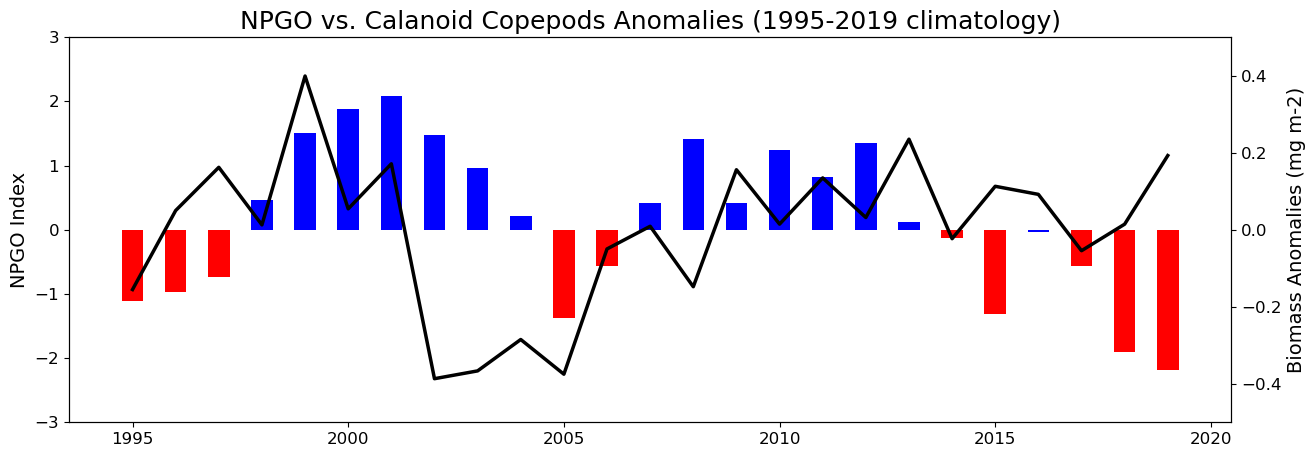

In [50]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()
colors=['r','r','r','b','b','b','b','b','b','b','r','r','b','b','b','b','b','b','b','r','r','b','r','r','r']

ax1.bar(Years, Annual_NPGO_index, width=.5, color=colors,label='NPGO Index')
ax2.plot(Years,CalanoidAnomaly,color='k',linewidth=2.5,label='0-100 m Diatom Anomalies')
ax1.set_ylim(-3,3)
ax2.set_ylim(-.5,.5)
ax1.set_ylabel('NPGO Index',fontsize=14)
ax2.set_ylabel('Biomass Anomalies (mg m-2)',fontsize=14)
ax1.set_title('NPGO vs. Calanoid Copepods Anomalies (1995-2019 climatology)',fontsize=18)

## Jellies

In [51]:
JelliesClimatology=logt(AnnualBiomass['Leptothecate']).mean()

In [52]:
JelliesAnomaly=(logt(AnnualBiomass['Leptothecate'])-JelliesClimatology)

Text(0.5, 1.0, 'NPGO vs. Jellies Anomalies (1995-2019 climatology)')

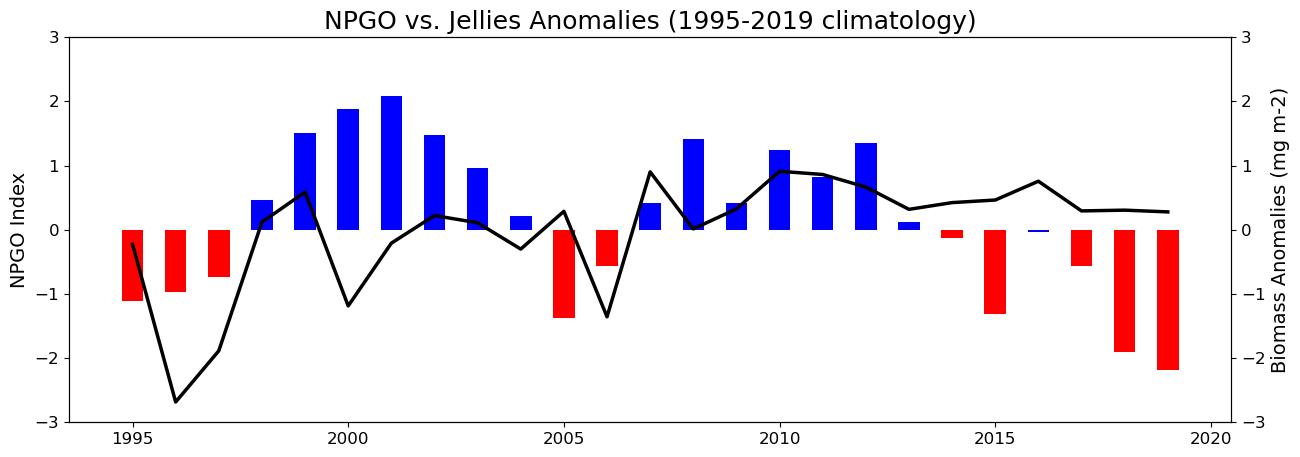

In [53]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()
colors=['r','r','r','b','b','b','b','b','b','b','r','r','b','b','b','b','b','b','b','r','r','b','r','r','r']

ax1.bar(Years, Annual_NPGO_index, width=.5, color=colors,label='NPGO Index')
ax2.plot(Years,JelliesAnomaly,color='k',linewidth=2.5,label='0-100 m Diatom Anomalies')
ax1.set_ylim(-3,3)
ax2.set_ylim(-3,3)
ax1.set_ylabel('NPGO Index',fontsize=14)
ax2.set_ylabel('Biomass Anomalies (mg m-2)',fontsize=14)
ax1.set_title('NPGO vs. Jellies Anomalies (1995-2019 climatology)',fontsize=18)

## Euphausiids

In [54]:
EuphausiidClimatology=logt(AnnualBiomass['Euphausiacea']).mean()

In [55]:
EuphausiidAnomaly=(logt(AnnualBiomass['Euphausiacea'])-EuphausiidClimatology)

Text(0.5, 1.0, 'NPGO vs. Euphausiid Anomalies (1995-2019 climatology)')

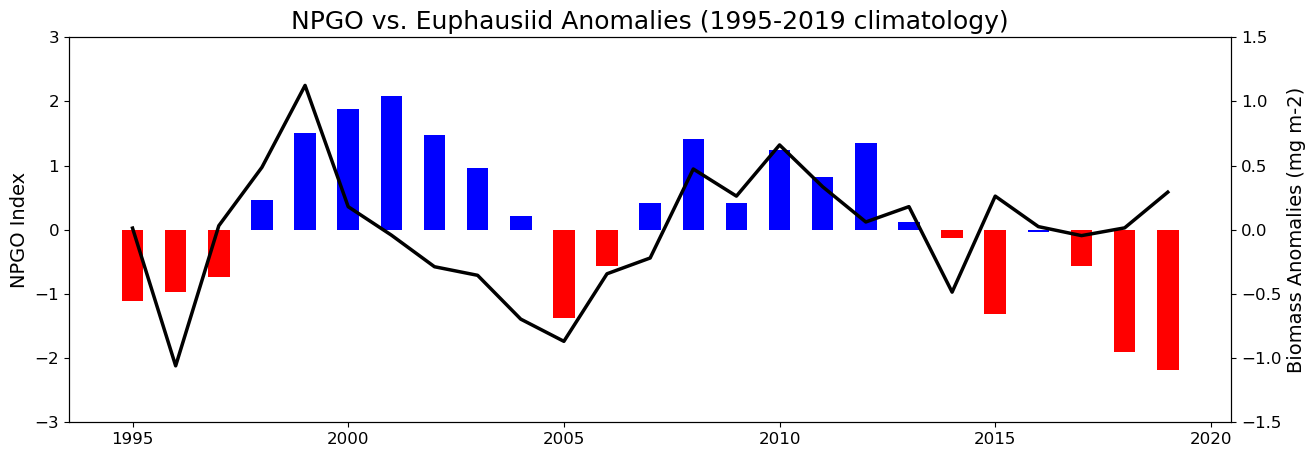

In [56]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()
colors=['r','r','r','b','b','b','b','b','b','b','r','r','b','b','b','b','b','b','b','r','r','b','r','r','r']

ax1.bar(Years, Annual_NPGO_index, width=.5, color=colors,label='NPGO Index')
ax2.plot(Years,EuphausiidAnomaly,color='k',linewidth=2.5,label='0-100 m Diatom Anomalies')
ax1.set_ylim(-3,3)
ax2.set_ylim(-1.5,1.5)
ax1.set_ylabel('NPGO Index',fontsize=14)
ax2.set_ylabel('Biomass Anomalies (mg m-2)',fontsize=14)
ax1.set_title('NPGO vs. Euphausiid Anomalies (1995-2019 climatology)',fontsize=18)

##### Euphausiid biomass seems to track best with NPGO, which could be driving the observed relationships between NPGO and zoop anomalies because they make up the majority of the biomass. Euphausiid biomass is not increasing as much in the recent (post 2015) years as the other groups.